# Lecture 6
## Histograms, Functions, and Apply

## Announcements

- HW due tonight.
    - Written questions to Gradescope.
    - Don't forget to tag pages.
- Discussion tomorrow.
- Control Panel, Stop My Server, to get histograms to work.

In [1]:
# imports!
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore') # just for the slides!
import numpy as np
from datascience import *

### Top Movies
* Read `top_movies.csv`
* Create column `Age` that denotes the age of a movie in years, from 2019

In [3]:
top_movies = Table.read_table('top_movies.csv')
aged = top_movies.with_column('Age', 2019 - top_movies.column('Year'))
aged

Title,Studio,Gross,Gross (Adjusted),Year,Age
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015,4
Avatar,Fox,760507625,846120800,2009,10
Titanic,Paramount,658672302,1178627900,1997,22
Jurassic World,Universal,652270625,687728000,2015,4
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012,7
The Dark Knight,Warner Bros.,534858444,647761600,2008,11
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999,20
Star Wars,Fox,460998007,1549640500,1977,42
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015,4
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012,7


### Categorical distribution of `Age`
Recall `.group("Age")` calculates the categorical distribution of the column `Age`.

In [90]:
aged.group("Age", max)#.bar('Age')

Age,Title max,Studio max,Gross max,Gross (Adjusted) max,Year max
4,Star Wars: The Force Awakens,Universal,906723418,906723400,2015
5,The Hunger Games: Mockingjay - Part 1,Warner Bros.,350126372,374796000,2014
6,The Hunger Games: Catching Fire,Universal,424668047,444697400,2013
7,The Hunger Games,Warner Bros. (New Line),623357910,668866600,2012
8,Transformers: Dark of the Moon,Warner Bros.,381011219,417512200,2011
9,Toy Story 3,Sum.,415004880,454156300,2010
10,Up,Warner Bros.,760507625,846120800,2009
11,The Dark Knight,Warner Bros.,534858444,647761600,2008
12,Transformers,Warner Bros.,336530303,425554300,2007
13,Pirates of the Caribbean: Dead Man's Chest,Fox,423315812,562266800,2006


Sometimes we want to collect nearby bars into a single bin, so we can see overall trends more easily.

## Histogram
A chart displaying the distribution of numerical values using bins

## Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Lower bound in included
* Upper bound is not included (unless it's the last bin)

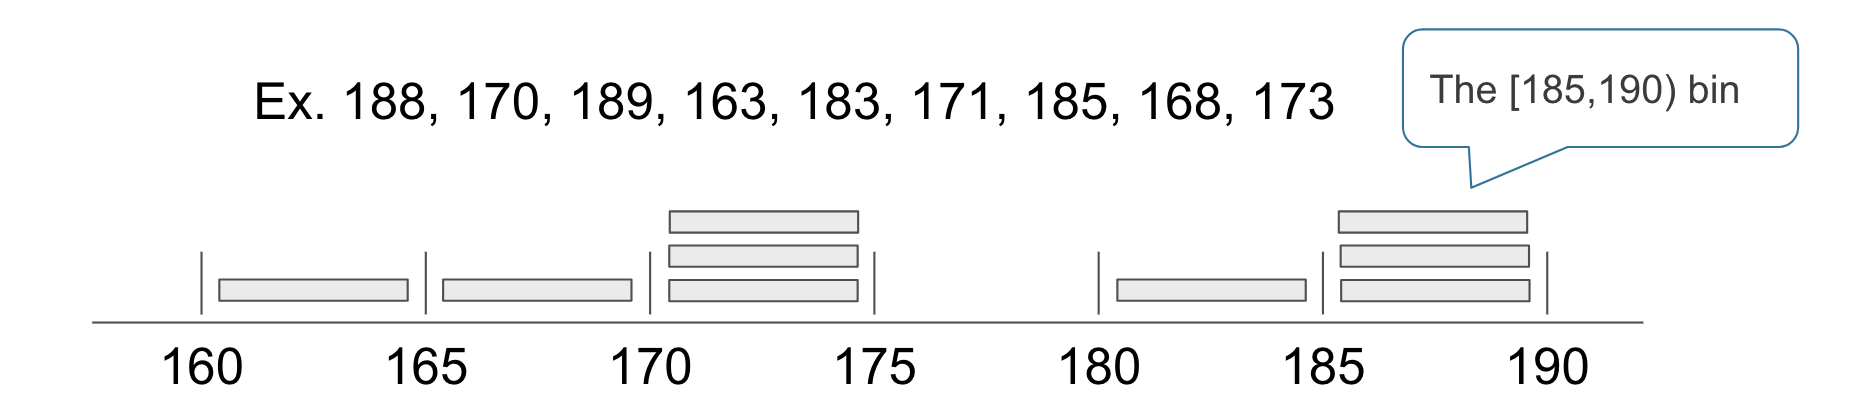    

### Numerical distribution of `Age`
The method `.bin(col, bins=arr)` calculates the distribution of values of `col` in each bin in the array `arr`.
* Bins need not be evenly spaced (e.g. [0, 5, 10, 20, 40, 65, 100])
* Last row of table (last entry in array) represents the right endpoint of the last bin.

In [11]:
aged.bin('Age', bins=[0, 5, 10, 20, 40, 65, 100])

bin,Age count
0,6
5,18
10,45
20,62
40,52
65,17
100,0


In [14]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40, 65, 100))

200

### Binning may not capture all the data
What happens if the right endpoint is `Age = 40`?
* May not capture all the data!

In [17]:
aged.bin('Age', bins=make_array(0, 5, 10, 20, 40))

bin,Age count
0,6
5,18
10,45
20,63
40,0


### Default binning
10 bins of equal width

In [19]:
aged.bin('Age').column('bin')

array([ 4. , 13.4, 22.8, 32.2, 41.6, 51. , 60.4, 69.8, 79.2, 88.6, 98. ])

In [16]:
bins = aged.bin('Age').column('bin')
bins

array([ 4. , 13.4, 22.8, 32.2, 41.6, 51. , 60.4, 69.8, 79.2, 88.6, 98. ])

### Plot a histogram of movie ages
* change to custom bins `np.arange(0, 101, 20)`; use `unit=year`.
* try `normed=False` for plot of counts. Why are the default units so strange?

In [22]:
aged.bin('Age', bins=np.arange(0, 101, 20))

bin,Age count
0,69
20,62
40,46
60,20
80,3
100,0


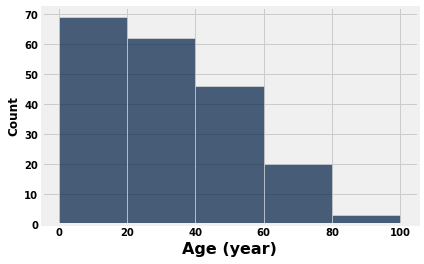

In [28]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year', normed=False) #try it without the last argument

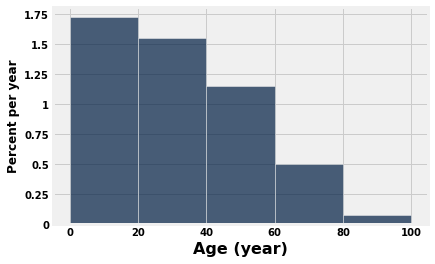

In [32]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year', normed=True) #try it without the last argument

### Discussion Question

What should happen to our histogram if we combine the two bins [20, 40) and [40, 60) into one large bin [20, 60)?

Option | Answer
--- | ---
A. | The new histogram should have four bars of equal width.
B. | The height of the bar for bin [20, 60) should be the sum of the heights of the bars for bins [20, 40) and [40, 60).
C. | The area of the bar for bin [20, 60) should be the sum of the areas of the bars for bins [20, 40) and [40, 60).
D. | More than one of the above.


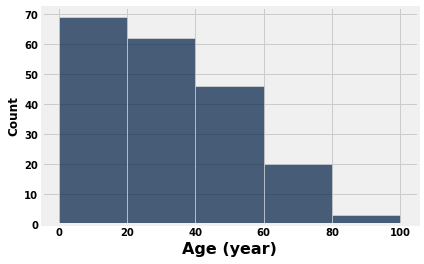

In [35]:
aged.hist('Age', bins=np.arange(0, 101, 20), unit='year', normed=False)

In [38]:
aged.bin('Age', bins=[0, 5, 10, 15,20,60, 70, 80,100])

bin,Age count
0,6
5,18
10,20
15,25
20,108
60,13
70,7
80,3
100,0


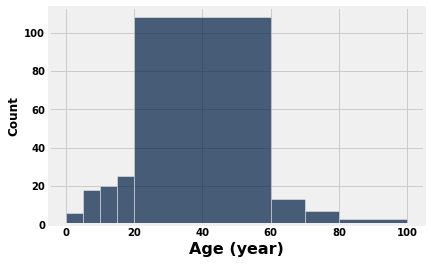

In [37]:
aged.hist('Age', bins=[0, 5, 10, 15,20,60, 70, 80,100], unit='year', normed=False)
#Keeping track of count in each bin without regard to how wide bins are is misleading.

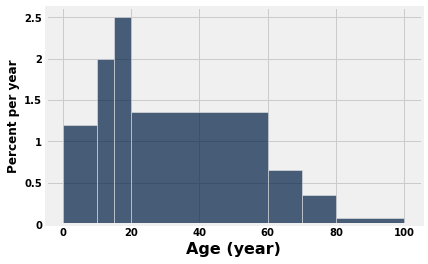

In [40]:
aged.hist('Age', bins=[0, 10, 15,20,60, 70, 80,100], unit='year') 
#allows for flexible bins without distorting what data looks like

# The Density Scale

### Histogram Axes

By default, `hist` uses a scale (`normed=True`) that ensures the area of the chart sums to 100%
* The horizontal axis is a number line (e.g. years)
* The vertical axis is a rate (e.g. percent per year)
* The area of the bar is a percentage of the whole

### Varying histogram bin sizes: how the y-axis changes

* Try varying number of bins: 1, 2, 5, 10, 20, 50
* Watch the y-axis and the total area

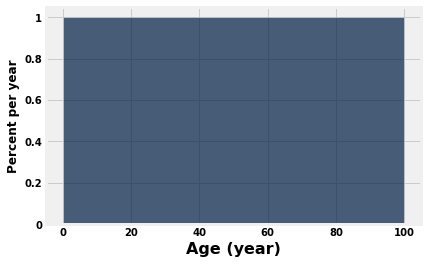

In [42]:
aged.hist('Age', bins=[0 ,100], unit='year')

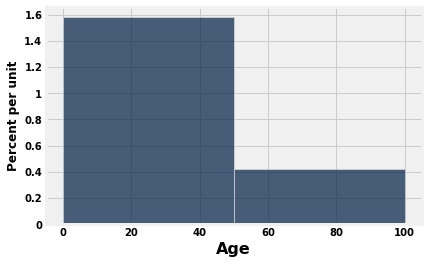

In [43]:
aged.hist('Age', bins=[0, 50 ,100])

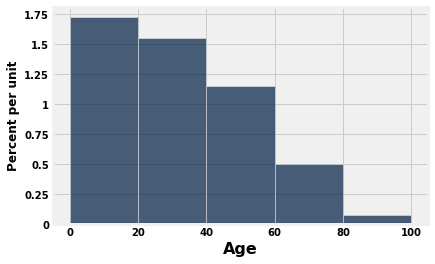

In [44]:
aged.hist('Age', bins=[0, 20, 40, 60, 80 ,100])

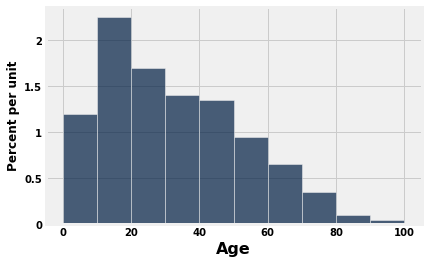

In [45]:
aged.hist('Age', bins=np.arange(0,101,10))

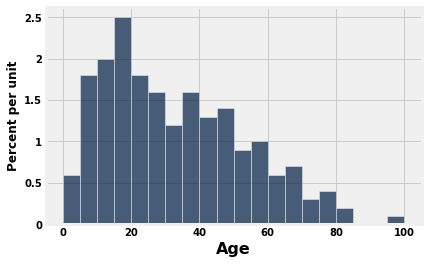

In [46]:
aged.hist('Age', bins=np.arange(0,101,5))

In [49]:
aged.where('Age', are.above(95))

Title,Studio,Gross,Gross (Adjusted),Year,Age
The Four Horsemen of the Apocalypse,MPC,9183673,399489800,1921,98


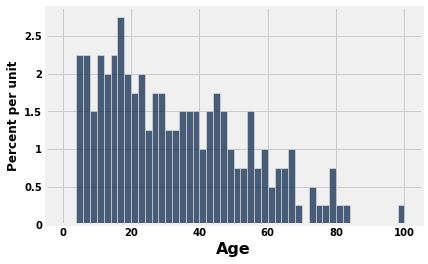

In [47]:
aged.hist('Age', bins=np.arange(0,101,2))

### How to calculate height

The $[20, 40)$ bin contains 62 out of 200 movies.
* $62/200 = 31%$
* The bin is $40 - 20 = 20$ years wide.

$$ \rm{Height\ of\ bar} = \frac{\rm{Area}}{\rm{Width}} = \frac{31 \%}{20\rm{\ years}} = 1.55\%\rm{\ per\ year} $$


### Height measures density

$$ \rm{Height} = \frac{\% \rm{\ in\ bin}}{\rm{width\ of\ bin}}$$

* The height measures the percent of data in the bin **relative to the amount of space in the bin**.
* Height measures crowdedness, or **density**.

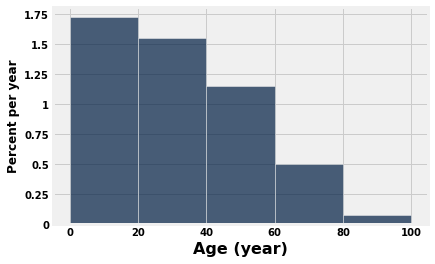

In [50]:
aged.hist('Age', bins=[0,20,40,60,80,100], unit='year')

### Discussion Question: Combining Bins

Suppose we combine the two bins [20, 40) and [40, 60) into one large bin [20, 60). What is the density of the new bin?

Option|Answer
---|---
A. | The new bin has about twice as many movies as each original bin, so it is about twice as dense as each original bin.
B. | The new bin is about twice as big as each original bin, so it is about half as dense as each original bin.
C. | The new bin has about twice as many movies and is twice as big as each original bin, so it is about the same density as each original bin.

In [ ]:
aged.hist('Age', bins=[0,20,40,60,80,100], unit='year')

In [ ]:
aged.hist('Age', bins=[0,20,60,80,100], unit='year')

### How many individuals are in the bin?

Remember that area represents a percentage of the total.

$$ \text{number of individuals in bin} = \text{area of bin} * \text{total number of individuals}$$

# Chart Types

## Bar Charts vs. Histograms

Bar Chart | Histogram
---|---
1 categorical axis & 1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, height and spacing | Horizontal axis is numerical and to scale
For distributions, length of bars are proportional to the percent of individuals | Height measures density; areas are proportional to the percent of individuals

# Overlaying plots

### Recall the female:male plot from the census
* There are *many* more women than men in old-age!

In [51]:
us_pop_2015 = Table.read_table('census.csv').select('SEX', 'AGE', 'POPESTIMATE2015').relabel('POPESTIMATE2015', '2015')
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999)).sort('AGE')
males = us_pop_2015.where('SEX',1).where('AGE', are.not_equal_to(999)).sort('AGE')
ratios = Table().with_columns('AGE', females.column('AGE'),'F:M RATIO', females.column('2015') / males.column('2015'))
ratios

AGE,F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


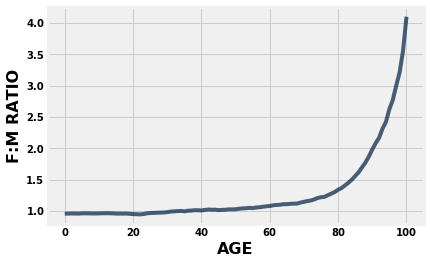

In [52]:

ratios.plot('AGE')

### What about absolute numbers?
* Make a new table with columns: `age`, `male population`, `female population`

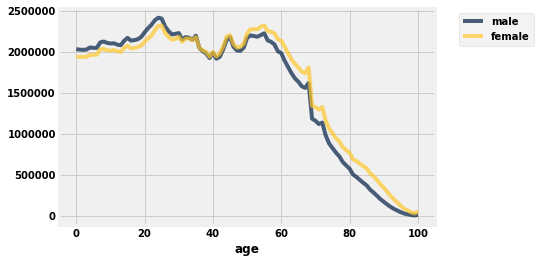

In [58]:
Table().with_columns(
    ('age', males.column('AGE')),
    ('male', males.column('2015')),
    ('female', females.column('2015'))
).plot('age')

### To plot multiple line graphs at once:
* Drop all extraneous columns from your table.
* Specify the column for the x-axis in the `.plot(col)` method.
* `plot` will plot **all** other columns on a shared y-axis.

Other plot types work similarly: `scatter`, `barh`

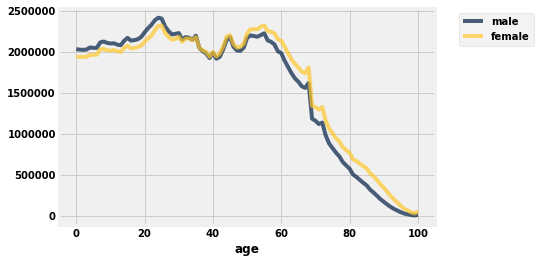

In [61]:
Table().with_columns(
    ('age', males.column('AGE')),
    ('male', males.column('2015')),
    ('female', females.column('2015'))
).plot('age')

# Overlaid Histograms

For visually comparing two populations

Galton collected data on the heights of families.

In [62]:
heights = Table.read_table('galton.csv').select('childHeight', 'father', 'mother').relabeled('childHeight', 'child')
heights

child,father,mother
73.2,78.5,67
69.2,78.5,67
69,78.5,67
69,78.5,67
73.5,75.5,66.5
72.5,75.5,66.5
65.5,75.5,66.5
65.5,75.5,66.5
71,75,64
68,75,64


### Plot histograms of `child`, `father`, and `mother` in one plot

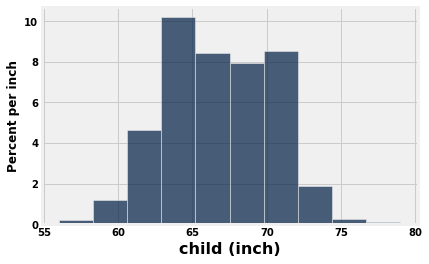

In [63]:
heights.hist('child', unit='inch')

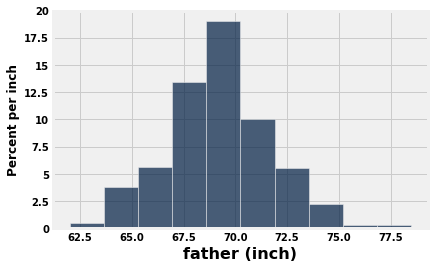

In [66]:
heights.hist('father', unit='inch')

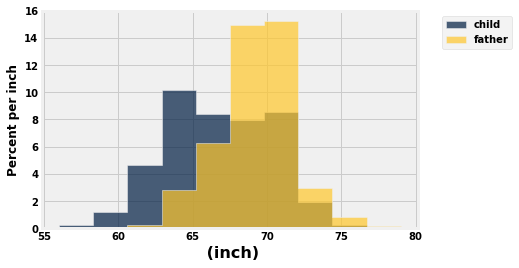

In [67]:
heights.hist('child', 'father', unit='inch')

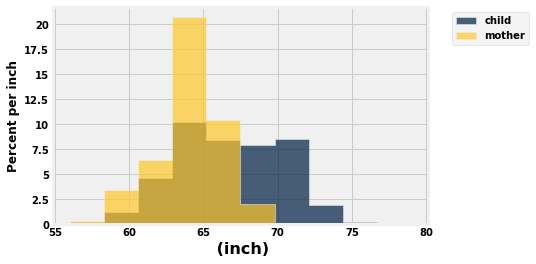

In [68]:
heights.hist('child', 'mother', unit='inch')

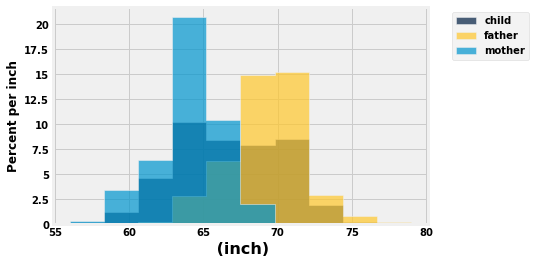

In [69]:
heights.hist('child', 'father', 'mother', unit='inch')

### Scatterplot is better
* In the histogram, you can't tell which father/mother goes with which child

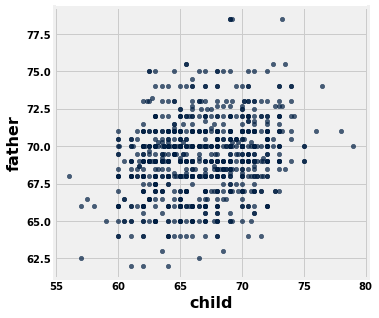

In [70]:
heights.scatter('child', 'father')

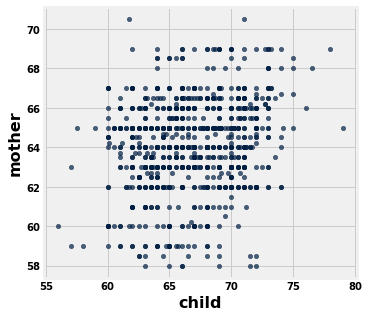

In [71]:
heights.scatter('child', 'mother')

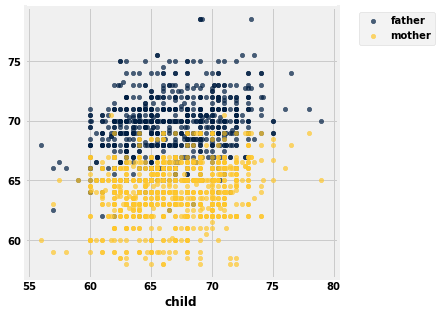

In [72]:
heights.scatter('child')

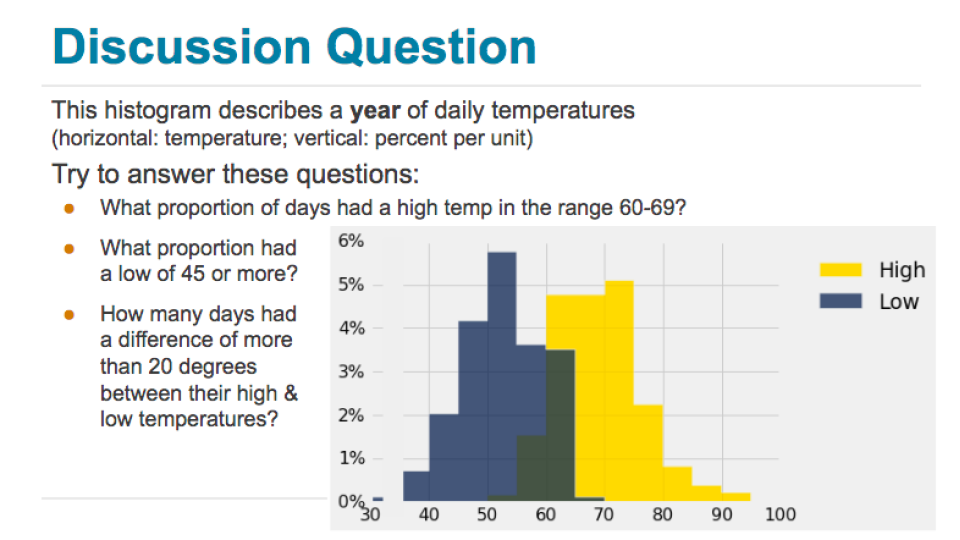

# Functions

## Defining functions
* We've learned a lot of table operations.
* So far, we've been restricted to using existing functions.
    - What if we need to clean a column with specialized logic? 
    - What if we want to understand the distribution of a custom measurement, derived from existing columns?

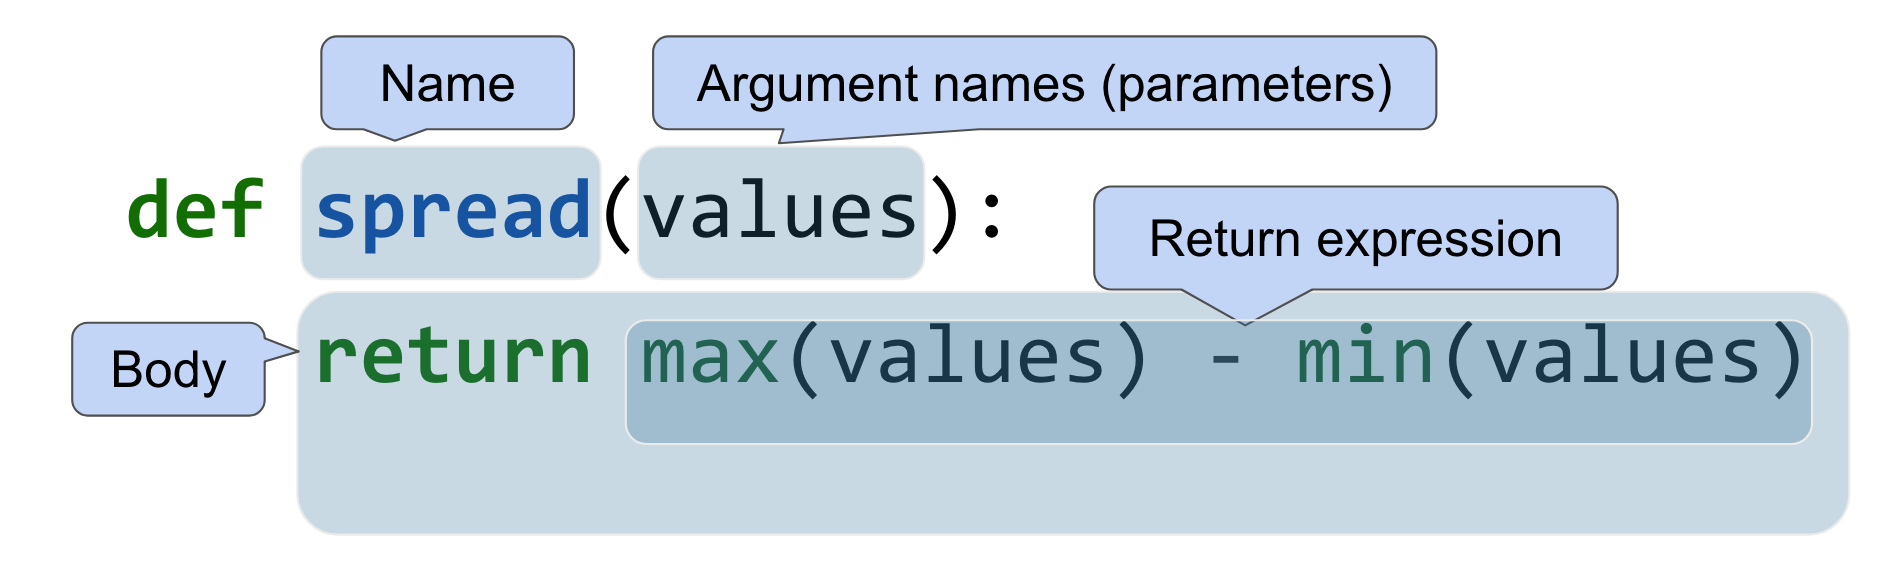

### `def` statements define functions
* User-defined functions give names to blocks of code.
* Functions are recipes; they are not run until you use (call) them.
* Variables defined in functions only exist inside the function.
* Inputs can be of any type.

In [74]:
def what_is_awesome(s):
    '''returns what's awesome'''
    return s + ' is awesome!'

In [76]:
#Call the function:
what_is_awesome('free wifi')

'free wifi is awesome!'

In [79]:
s

NameError: name 's' is not defined

In [81]:
def where_is_the_error(s):
    '''illustrates errors don't occur until functions are executed (called)'''
    return 4.0 + s + ' is awesome!'

In [83]:
where_is_the_error(3.7)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

### Example: counts to percent

Create a function that converts an array of counts to percentages of the total
* include docstring

In [85]:
def percents(counts):
    ''' Converts counts to percents out of the total'''
    counts = np.array(counts)  # make sure counts is an array
    total = counts.sum()
    return counts/total*100  # extra: how would you round it to two decimal places?

percents([1,2,3]) #--> should output 16.666666, 33.33333333, 50

array([16.66666667, 33.33333333, 50.        ])

In [86]:
help(percents)

Help on function percents in module __main__:

percents(counts)
    Converts counts to percents out of the total



### Example: counts to percent
* Add an argument for decimal places
* Give the second argument a default values

In [ ]:
def percents(counts, decimal_places):
    ''' Converts counts to percents out of the total'''
    counts = np.array(counts)  # make sure the container is an array
    total = sum(counts)
    return np.round(counts / total * 100, decimal_places)

percents([1,2,3], 0)

In [ ]:
def percents(counts, decimal_places=2):
    ''' Converts counts to percents out of the total'''
    counts = np.array(counts)  # make sure the container is an array
    total = sum(counts)
    return np.round(counts / total * 100, decimal_places)

percents([1,2,3])

In [ ]:
percents([1,2,3], decimal_places=3)

# Applying Functions to Tables

## Apply

The `apply` method creates an array by calling a function on every element of the input column(s).
* First argument: Function to apply
* Other argument(s): The input column(s)

```
table_name.apply(function_name, 'column_label')
```

### Use apply to do custom data cleaning
* Very few older people -- replace all 3 digit ages with 100

In [ ]:
mini_census = Table().with_columns(
    ['Name', ['Ashley', 'Ben', 'Charlie', 'David', 'Ella', 'Frank', 'Greta', 'Henry'], 
     'Age', [27, 68, 106, 51, 102, 27, 115, 2]]
)

mini_census

### Use `apply` to clean data
* Create a function that returns the smallest of `Age` and 100.
* Apply it to all people in census
* Create a new column with cleaned data

In [ ]:
def cut_off_at_100(age):
    '''The smaller of x and 100'''
    return min(age, 100)

mini_census.apply(cut_off_at_100, 'Age')

In [ ]:
mini_census = mini_census.with_column('Age Cleaned', mini_census.apply(cut_off_at_100, 'Age'))
mini_census

### Discussion Question

If the name of the table is `top_movies` and the name of a column is "Title", how do we find the length of each movie title?

Option|Answer
---|---
A|`top_movies.apply(len(s), 'Title')`
B|`top_movies.apply(len(), 'Title')`
C|`top_movies.apply(len, 'Title')`
D|`Title.apply(len, 'top_movies')`
E|`Title.apply(len(), 'Title')`

In [ ]:
top_movies = Table.read_table('top_movies.csv')
top_movies.apply(len, 'Title')

## Example: Prediction

### Sir Francis Galton

* 1822 - 1911 (knighted in 1909)
* A pioneer in making predictions
* Particular interest in heredity
* Charles Darwin's half-cousin




### Can we predict the height of a child, given the height of their parents?
* read in heights from `galton.csv`
* relabel columns for convenience

In [ ]:
galton = (
    Table
    .read_table('galton.csv')
    .relabeled('midparentHeight', 'midparent')
    .relabeled('childHeight', 'child')
)

heights = galton.select('midparent', 'mother', 'father', 'child')
heights

## Can we predict the height of a child, given the height of their parents?

### scatterplot of child vs. mother/father
* Children's height influenced by a combination of the height of the mother and father

In [ ]:
heights.select('child', 'mother', 'father').scatter('child')

### scatterplot of midparent vs child height
* Galton calculated the variable `midparent` that is a weighted average of the parents' height

In [ ]:
heights.scatter('midparent', 'child')

### Can we predict the height of a child, given the midparent height?
* Use the current dataset to inform a prediction of new, unseen parents/children.

In [ ]:
heights.scatter('midparent', 'child')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

### Can we predict the height of a child, given the midparent height?

* Given the midparent height, restrict to nearby examples in the dataset (within 0.5 in).
* Take the average child height within these nearby examples.
* This average is our guess!

In [ ]:
def predict_child(mp):
    '''returns a childs predicted height, given the midparent height, mp.'''
    nearby = heights.where('midparent', are.between_or_equal_to(mp - 0.5, mp + 0.5))
    return nearby.column('child').mean()

predict_child(68)

### Can we predict the height of a child, given the midparent height?
* Apply our function to all our examples
* Create a new column called `prediction` and plot the output 

In [ ]:
heights = heights.with_column('prediction', heights.apply(predict_child, 'midparent'))
heights

In [ ]:
heights.select('midparent', 'child', 'prediction').scatter('midparent')

# `apply` using Multiple Arguments

### `apply` using Multiple Arguments

The apply method creates an array by calling a function on every element in one or more input columns.
* First argument: Function to apply
* Other argument(s): The input column(s)
* If no columns are supplied, then applies to whole row

```
table_name.apply(function_name, 'column_label1',...,'column_labelN')
```

### Recreate midparent using a function
* Weighted average of father (1.07) and mother (1.0)
* Compare runtime of applying a custom function vs. numpy column operations

In [ ]:
def calc_mp(mother, father):
    return (mother + 1.07 * father) / 2

In [ ]:
%timeit heights.apply(calc_mp, 'mother', 'father')

In [ ]:
%timeit (heights.column('mother') + heights.column('father') * 1.07)/2